# Altair

- [Altair Homepage](https://altair-viz.github.io/)

- [Altair Github](https://github.com/altair-viz)

- [Altair Tutorial](https://github.com/altair-viz/altair-tutorial)

Altair is a *declarative, statistical* visulization library for Python that as been buit on top of [Vega](http://vega.github.io/vega).  

**Goal:** Visaulization concepts should map directly to visual implementation. Think about data and relationships, rather than the incidental details of creating a visualization.


## Declarative
- Specify *what* should be, not how its down
- Separate specification from exection

SQL is prime example of a declarative programming language.  Users do not detail how retrieval, filtering (where clause) or joins occur.


### Building Blocks
1. Data  - data source to visualize
2. Transformation - filter, aggregration, binning, ...
3. Marks - data-representative graphics: area, point, bar, line, ...
4. Encoding - mapping from fields to mark properties
5. Scale - functions that map data values to visual values (axes, colors)
6. Guides - axes and legends that visualize scales


## Statistical
Library contains built in support for aggregations and transformations.  Altair also assumes that the datasets have been converted in a "[Tidy](https://vita.had.co.nz/papers/tidy-data.pdf)" data structure. In a Tidy data format, similar to normalized data tables for SQL, we have the following rules:
1. Each variable must have its own column  (columns are features)
2. Each observation must have its own row  (rows are samples)
3. Each value must have its own cell


## Install Notes
To install altair and vega_datasets
```
pip install altair vega_datasets
```

## Sample Code
### Standard Imports

In [1]:
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data

### Revisit Matplotlib sample line plot
Notice, how the commands detail what needs to be done to create the plot.  
Also notice, how the data is effectively organized into a dataframe with columns of x, x^1, x^2, and x^3. Raising x to the *i*th
power can effectively be seen as a treatment.

In [2]:
x = np.linspace(0, 2, 100)
d = np.array((x,x,x**2,x**3)).transpose()
df =  pd.DataFrame(data=d,columns=['x','linear', 'squared','cubed'])
df.head()

,x,linear,squared,cubed
0,0.000000,0.000000,0.000000,0.000000
1,0.020202,0.020202,0.000408,0.000008
2,0.040404,0.040404,0.001632,0.000066
3,0.060606,0.060606,0.003673,0.000223
4,0.080808,0.080808,0.006530,0.000528


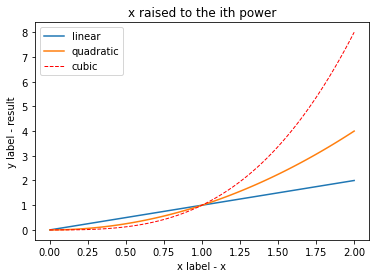

In [3]:
x = np.linspace(0, 2, 100)

plt.plot(df.x, df.linear, label='linear')
plt.plot(df.x, df.squared, label='quadratic')
plt.plot(df.x, df.cubed, label='cubic',c='#FF0000', linewidth=1,linestyle='dashed')

plt.xlabel('x label - x')
plt.ylabel('y label - result')

plt.title("x raised to the ith power")

plt.legend(loc="best")

plt.show()

Convert the dataframe into a tidy dataframe

In [4]:
tidyDF = df.melt('x',var_name='power')
tidyDF.head()

,x,power,value
0,0.000000,linear,0.000000
1,0.020202,linear,0.020202
2,0.040404,linear,0.040404
3,0.060606,linear,0.060606
4,0.080808,linear,0.080808


In [5]:
alt.Chart(tidyDF).mark_line().encode(
    x='x',
    y=alt.Y('value', title='The Y Axis Title'),
    color=alt.Color('power', title = 'Power', sort=None)
).properties(title='ith Power of X')


alt.Chart(...)

#### Altair Notes
- Define the data by passing in the data frame to the "Chart()" method
- Type of graph is line as determined by "mark_line()"
- Map data to aesthetics with x,y, and color to columns in the dataframe
- Add ".interactive()" to allow the user to interact with the chart - move and zoom

Note: pandas provides support for creating plots directly form series and dataframe objects.  These effectively wrap around 
matplotlib with basic defaults.

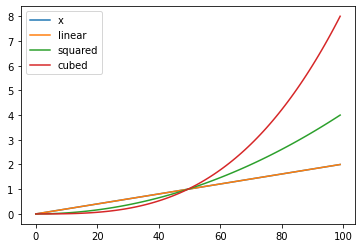

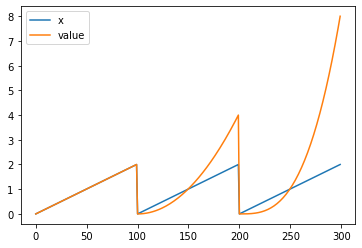

In [6]:
df.plot();
tidyDF.plot();

## Produce charts from the mpg dataset
load the [mpg dataset](https://ggplot2.tidyverse.org/reference/mpg.html)  
Source: https://github.com/tidyverse/ggplot2/blob/master/data-raw/mpg.csv

In [7]:
try:
  import google.colab
  data_file_prefix = "https://raw.githubusercontent.com/slankas/VisualizationCode/master/Python/"
  import plotly.io as pio
  pio.renderers.default = 'colab'
except:
  data_file_prefix = ""


mpg = pd.read_csv(data_file_prefix + "mpg.csv")

Quick exploratory data analysis

In [8]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [9]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
mpg.describe(include='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
count,234,234,234.000000,234.000000,234.000000,234,234,234.000000,234.000000,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.471795,2003.500000,5.888889,NaN,NaN,16.858974,23.440171,NaN,NaN
std,NaN,NaN,1.291959,4.509646,1.611534,NaN,NaN,4.255946,5.954643,NaN,NaN
min,NaN,NaN,1.600000,1999.000000,4.000000,NaN,NaN,9.000000,12.000000,NaN,NaN
25%,NaN,NaN,2.400000,1999.000000,4.000000,NaN,NaN,14.000000,18.000000,NaN,NaN
50%,NaN,NaN,3.300000,2003.500000,6.000000,NaN,NaN,17.000000,24.000000,NaN,NaN
75%,NaN,NaN,4.600000,2008.000000,8.000000,NaN,NaN,19.000000,27.000000,NaN,NaN


## Visualizing Amounts

### Bar Plots
Bar charts are useful to display counts and other values associated with categorical data.

In [11]:
alt.Chart(mpg).mark_bar().encode(
    x='manufacturer',
    y='count(manufacturer)'
)

alt.Chart(...)

In [12]:
alt.Chart(mpg).mark_bar().encode(
    x=alt.X('manufacturer', sort='-y'),
    y='count(manufacturer)'
)

alt.Chart(...)

Note: The pandas wrapper largely does this through the defaults:

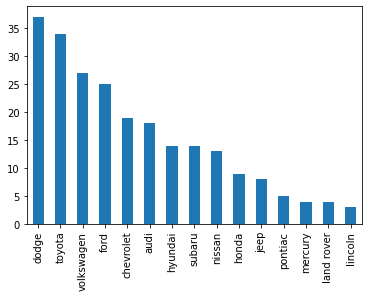

In [13]:
mpg['manufacturer'].value_counts().plot(kind='bar');

However, directly using the matplotlib library requires more specification on how to do it, especially with the labels:

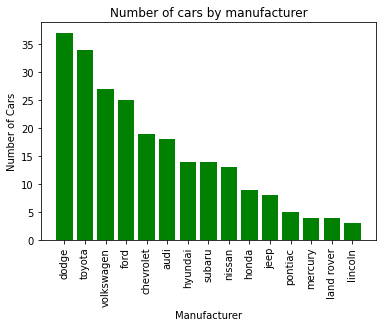

In [14]:
m_counts = mpg['manufacturer'].value_counts()

plt.bar(m_counts.index, m_counts, color='green')
plt.xlabel("Manufacturer")
plt.ylabel("Number of Cars")
plt.title("Number of cars by manufacturer")
plt.xticks([i for i, _ in enumerate( m_counts.index)], m_counts.index, rotation='vertical')


plt.show()

### switch to a horizontal bar
Just flip the x and y encodings

In [15]:
alt.Chart(mpg).mark_bar().encode(
    y=alt.Y('manufacturer', sort='-x'),
    x='count(manufacturer)'
)

alt.Chart(...)

In [16]:
alt.Chart(mpg).mark_bar().encode(
    x='drv:O',
    y='count(class):Q',
    color='drv',
    column='class'
)

alt.Chart(...)

In [17]:
alt.Chart(mpg).mark_bar().encode(
    y='drv:O',
    x='count(class):Q',
    color='drv',
    row='class'
)

alt.Chart(...)

In [18]:
### Stacked Bar Chart

In [19]:
alt.Chart(mpg).mark_bar().encode(
    x='manufacturer',
    y='count(manufacturer)',
    color='drv'
)

alt.Chart(...)

In [20]:
alt.Chart(mpg).mark_bar().encode(
    y=alt.Y('manufacturer',sort='-x'),
    x='count(manufacturer)',
    color='drv'
)

alt.Chart(...)

### Dot Plot
This is really just a scatter plot, but using a categorical variable for the y-axis

In [21]:
xMin = mpg['cty'].min()
xMax = mpg['cty'].max()
alt.Chart(mpg).mark_point().encode(
    x=alt.X('mean(cty)',title='Average City MPG',scale=alt.Scale(domain=(xMin, xMax))),
    y=alt.Y('manufacturer',sort='-x'),
).properties(title="Manufacturer's Average MPG for the City")

alt.Chart(...)

## Visualizing Distribution

### Histogram

In [22]:
N_points = 1000
n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
x = np.random.randn(N_points)
d = np.array((x)).transpose()
df =  pd.DataFrame(data=d,columns=['x'])

alt.Chart(df).mark_bar().encode(
    x=alt.X('x', bin=alt.Bin(maxbins=n_bins),title='X'),
    y='count()'
)

alt.Chart(...)

In [23]:
base = alt.Chart(df).properties(title='Distribution of X with mean bar')

bar = base.mark_bar().encode(
    x=alt.X('x', bin=alt.Bin(maxbins=n_bins),title='X'),
    y='count()'
)

rule = base.mark_rule(color='red').encode(
    x='mean(x)',
    size=alt.value(2)
)

bar + rule

alt.LayerChart(...)

In [24]:
alt.Chart(mpg).mark_boxplot().encode(
    x='manufacturer',
    y='hwy'
).properties(title='Distribution of Highway MPG by Manufacturer')

alt.Chart(...)

## Visaulizing Relationships

### Scatterplots

In [25]:
alt.Chart(mpg).mark_point().encode(
    x=alt.X('displ',title='Displacement'),
    y=alt.Y('hwy',title='Highway MPG'),
).properties(title="Highway MPG vs. Displacement")

alt.Chart(...)

In [26]:
alt.Chart(mpg).mark_point().encode(
    x=alt.X('displ',title='Displacement'),
    y=alt.Y('hwy',title='Highway MPG'),
    color='class',
    size='cyl',
    shape='drv'
).properties(title="Highway MPG vs. Displacement")

alt.Chart(...)

## Visualizing Comparisons
### Slope graph
The key idea is that we are showing lines between two different "treatments".  That could be years to show a change from start to finish or a category to show the difference between two different values.

For this example, we are going to compare the average MPG for city and highway by manufacturer. To do this within Altair (and other grammar-based libraries), we need to recognize that the hwy and city columns are values, not variable names.  This requires melting those columns into two columns: "column type" and the value.

In [27]:
mpgMelted = mpg.melt(id_vars=['manufacturer','model','displ','year','cyl','trans','drv','fl','class'],value_vars=['cty','hwy'],var_name='mpg')
mpgMelted.head()

,manufacturer,model,displ,year,cyl,trans,drv,fl,class,mpg,value
0,audi,a4,1.8,1999,4,auto(l5),f,p,compact,cty,18
1,audi,a4,1.8,1999,4,manual(m5),f,p,compact,cty,21
2,audi,a4,2.0,2008,4,manual(m6),f,p,compact,cty,20
3,audi,a4,2.0,2008,4,auto(av),f,p,compact,cty,21
4,audi,a4,2.8,1999,6,auto(l5),f,p,compact,cty,16


In [28]:
alt.Chart(mpgMelted).mark_line().encode(
    x='mpg',
    y='mean(value)',
    color='manufacturer'
).properties(width=400)

alt.Chart(...)

## Visualizing Geospatial Data
### Choropleth

In [29]:
counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

alt.Chart(...)

## Review Activity

Altair and Vega provide a number of datasets through the python library "vega_datasets"
```
from vega_datasets import data
```
To see the available datasets: ```data.list_datasets()```
To get a description of a particular set: ```data.setName.description```

**Exercises**
1. Using the stocks data set, produce a line graph of the performance(price) of the 5 available stocks over the time range.
2. Using the cars dataset, repeat many of the graphs produced for the mpg dataset.